# Salary Prediction

In [1]:
import pandas as pd

In [2]:
df3 = pd.read_csv(r"C:\Users\Admin\Downloads\Salary_dataset.csv")
df3

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
df3.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df3.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
df3.shape

(30, 3)

In [7]:
df3.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


## Visualization 

<Axes: xlabel='YearsExperience', ylabel='Salary'>

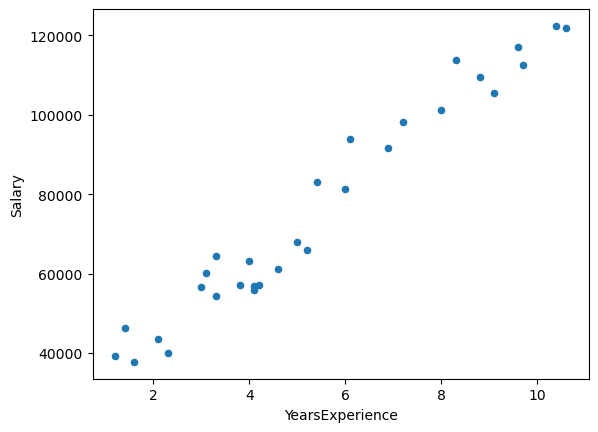

In [10]:
# Scatter plot
df3.plot(x="YearsExperience", y="Salary",kind="scatter")

In [11]:
# putting feature variable to x
x=df3["YearsExperience"]
# print first 5 rows
x.head()


0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: YearsExperience, dtype: float64

In [12]:
# putting feature variable to y
y=df3["Salary"]
# print first 5 rows
y.head()


0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

## Splitting datas into Test and Taining datas

In [13]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7 , random_state=0000)

In [14]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(21,)
(21,)
(9,)
(9,)


In [16]:
import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train=np.array(X_train)[:, np.newaxis]
X_test=np.array(X_test)[:, np.newaxis]

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(21, 1)
(21,)
(9, 1)
(9,)


## Performing Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, Y_train)

LinearRegression()

## Coefficient calculations

In [19]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

25842.36521257827
[9360.26128619]


## Predictions

In [20]:
# making predictions on the test sets
Y_pred = lr.predict(X_test)


In [21]:
type(Y_pred)

numpy.ndarray

In [22]:
Y_test.shape 

(9,)

Text(0, 0.5, 'Sales')

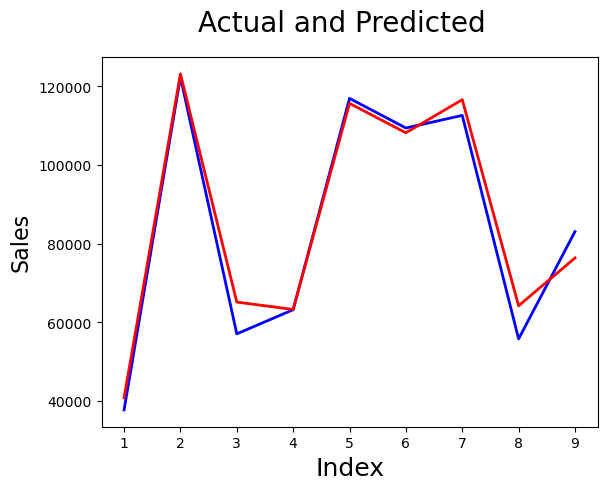

In [23]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range (1,10,1)]                               # generating index 
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

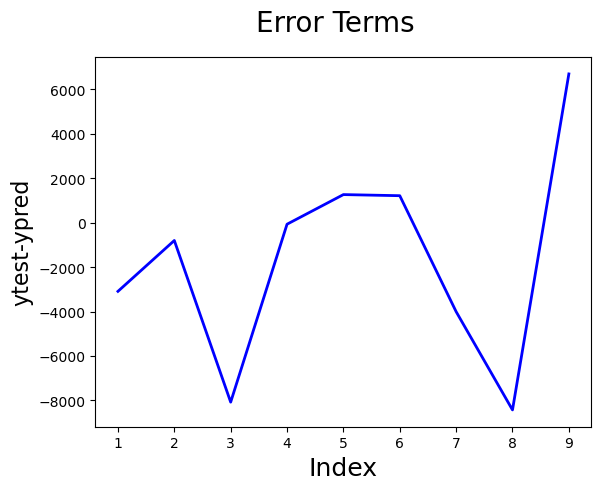

In [24]:
# Error Terms
c = [i for i in range(1,10,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)

In [27]:
r_squared = r2_score(Y_test, Y_pred)

In [28]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23370078.80083297
r_square_value : 0.9740993407213511


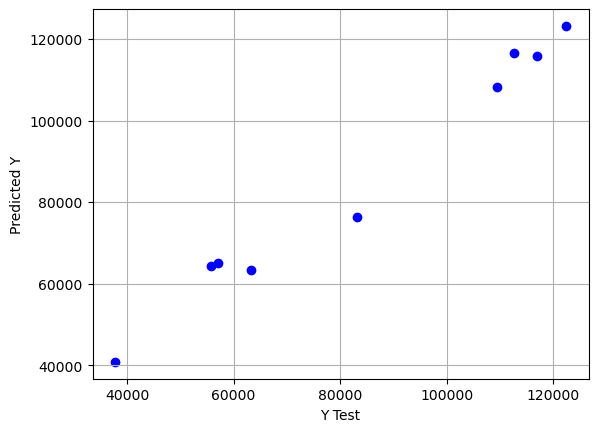

In [29]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
